# Covid19 Visualizer

In [1]:
%matplotlib notebook

In /home/duka/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/duka/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/duka/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


### Colab instructions

- If you are running the notebook in Google Colab, make sure to uncomment the cell bellow and run it, so that it installs the necessary packages and fetches the necessary data. 

In [ ]:
# !pip install mplcursors
# %mkdir data
# !gdown https://drive.google.com/uc?id=19b_TP8CKkBPoziiO8m5sVsKSTgmAk-kZ -O data/body_volume.npy
# !gdown https://drive.google.com/uc?id=1Y4v3vePcH6fqyBpdxWHkE1kFEca4BCmO -O data/hull_faces.npy
# !gdown https://drive.google.com/uc?id=1FmHEHaPmZnuHSBS-zOaYqc2ykl_ZP2pK -O data/covid_papers_data.json
# !gdown https://drive.google.com/uc?id=1ZgrGOcpminYDjgW32NHuS7RXey9LrlTi -O data/covid_papers_metadata.json

## Importing the necessary packages

In [6]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.backend_bases import MouseButton
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import proj3d
import ipywidgets as widgets
import mplcursors

## Loading the preparing the data

In [7]:
volume = np.load("data/body_volume.npy")
hull_faces = np.load("data/hull_faces.npy")
dimensions = list(volume.shape[:-1])

In [8]:
dframe_data = pd.read_json("data/covid_papers_data.json")
dframe_metadata = pd.read_json("data/covid_papers_metadata.json")

In [9]:
data = dframe_data.text_mapping.values
data = np.array([np.array(item) for item in data])
data = np.concatenate((data[:, 2][:, None], data[:, 0][:, None], data[:, 1][:, None]), axis=1)
data = np.clip(data, np.array([0.0, 0.0, 0.0]), np.array(dimensions) - 1.0)

## Interactive plots

<IPython.core.display.Javascript object>


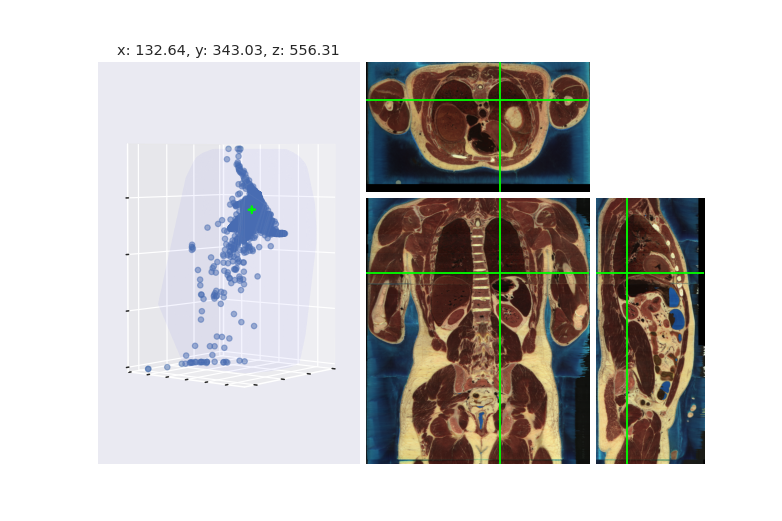

GridBox(children=(HTML(value='', description='Title:'), HTML(value='', description='Author(s):'), HTML(value='…

In [10]:
point = [0.0, 0.0, 0.0]

title_box = widgets.HTML(
    value="",
    description="Title:"
)

author_box = widgets.HTML(
    value="",
    description="Author(s):"
)

year_box = widgets.HTML(
    value="",
    description="Date:"
)

doi_box = widgets.HTML(
    value="",
    description="DOI:",
)

pid_box = widgets.HTML(
    value="",
    description="ID:",
)

abstract_box = widgets.HTML(
    value="",
    description="Abstract:",
)


def create_crosshair(point):
    
    line1, = ax1.plot(point[0] * np.ones(25),
                      point[1] * np.ones(25), 
                      np.arange(point[2]-12, point[2]+13),
                      c='lime',
                      linewidth=2,
                      picker=False)
    line2, = ax1.plot(point[0] * np.ones(25),
                      np.arange(point[1]-12, point[1]+13),
                      point[2] * np.ones(25),
                      c='lime',
                      linewidth=2,
                      picker=False)
    line3, = ax1.plot(np.arange(point[0]-12, point[0]+13),
                      point[1] * np.ones(25),
                      point[2] * np.ones(25), 
                      c='lime',
                      linewidth=2,
                      picker=False)
    return line1, line2, line3



def update_crosshair(point):
    
    line1.set_data(point[0] * np.ones(25), point[1] * np.ones(25))
    line1.set_3d_properties(np.arange(point[2]-12, point[2]+13))
    
    line2.set_data(point[0] * np.ones(25), np.arange(point[1]-12, point[1]+13))
    line2.set_3d_properties(point[2] * np.ones(25))
    
    line3.set_data(np.arange(point[0]-12, point[0]+13), point[1] * np.ones(25))
    line3.set_3d_properties(point[2] * np.ones(25))


def onclick(event):
    '''
    Event handler for button_press_event
    @param event MouseEvent
    '''
    if event.button != MouseButton.LEFT:
        return
    
    if event.inaxes == ax2:   
        
        point[0] = volume.shape[0] - event.ydata
        point[2] = event.xdata
        
        horiz2.set_ydata(event.ydata)
        vert2.set_xdata(event.xdata)
        
        horiz3.set_ydata(event.ydata)
        ax3.index = int(event.xdata)
        ax3.images[0].set_array(volume[:, :, ax3.index])
        
        vert4.set_xdata(event.xdata)
        ax4.index = int(event.ydata)
        ax4.images[0].set_array(volume[ax4.index, :, :])
        
        ax1.set_title(f"x: {point[1]:.2f}, y: {point[2]:.2f}, z: {point[0]:.2f}")
        
    elif event.inaxes == ax3:
        
        point[0] = volume.shape[0] - event.ydata
        point[1] = event.xdata
        
        horiz3.set_ydata(event.ydata)
        vert3.set_xdata(event.xdata)
        
        horiz2.set_ydata(event.ydata)
        ax2.index = int(event.xdata)
        ax2.images[0].set_array(volume[:, ax2.index, :])
        
        horiz4.set_ydata(event.xdata)
        ax4.index = int(event.ydata)
        ax4.images[0].set_array(volume[ax4.index, :, :])
        
        ax1.set_title(f"x: {point[1]:.2f}, y: {point[2]:.2f}, z: {point[0]:.2f}")
        
    elif event.inaxes == ax4:
        
        point[1] = event.ydata
        point[2] = event.xdata
        
        horiz4.set_ydata(event.ydata)
        vert4.set_xdata(event.xdata)
        
        vert2.set_xdata(event.xdata)
        ax2.index = int(event.ydata)
        ax2.images[0].set_array(volume[:, ax2.index, :])
        
        vert3.set_xdata(event.ydata)
        ax3.index = int(event.xdata)
        ax3.images[0].set_array(volume[:, :, ax3.index])
        
        ax1.set_title(f"x: {point[1]:.2f}, y: {point[2]:.2f}, z: {point[0]:.2f}")
        
    else:
        return
    
    update_crosshair([point[1], point[2], point[0]])
    
    ind = np.argmin(np.square(np.array(point) - data).sum(axis=1))
    
    paper_id = dframe_data.iloc[ind]['paper_id']
    title_box.value = dframe_data.iloc[ind]['title']
    author_box.value = dframe_data.iloc[ind]['author']
    abstract_box.value = dframe_data.iloc[ind]['abstract']
    author = dframe_metadata[dframe_metadata['sha'] == paper_id]['authors'].item()
    if author:
        author = ",  ".join(author.split("'")[1::2])
    author_box.value = author
    year_box.value = dframe_metadata[dframe_metadata['sha'] == paper_id]['publish_time'].item()
    pid_box.value = paper_id
    doi_box.value = dframe_metadata[dframe_metadata['sha'] == paper_id]['doi'].item()
    
    
def onpick(event):
    ind = event.ind[0]
    point = data[ind]
    ax1.set_title(f"x: {point[1]:.2f}, y: {point[2]:.2f}, z: {point[0]:.2f}")

    ax2.index = int(point[1])
    ax2.images[0].set_array(volume[:, ax2.index, :])
    horiz2.set_ydata(volume.shape[0] - point[0])
    vert2.set_xdata(point[2])

    ax3.index = int(point[2])
    ax3.images[0].set_array(volume[:, :, ax3.index])
    horiz3.set_ydata(volume.shape[0] - point[0])
    vert3.set_xdata(point[1])

    ax4.index = int(volume.shape[0] - point[0])
    ax4.index = max(0, min(ax4.index, volume.shape[0] - 1))
    ax4.images[0].set_array(volume[ax4.index, :, :])
    horiz4.set_ydata(point[1])
    vert4.set_xdata(point[2])
    
    update_crosshair([point[1], point[2], point[0]])
    
    paper_id = dframe_data.iloc[ind]['paper_id']
    title_box.value = dframe_data.iloc[ind]['title']
    author_box.value = dframe_data.iloc[ind]['author']
    abstract_box.value = dframe_data.iloc[ind]['abstract']
    author = dframe_metadata[dframe_metadata['sha'] == paper_id]['authors'].item()
    if author:
        author = ",  ".join(author.split("'")[1::2])
    author_box.value = author
    year_box.value = dframe_metadata[dframe_metadata['sha'] == paper_id]['publish_time'].item()
    pid_box.value = paper_id
    doi_box.value = dframe_metadata[dframe_metadata['sha'] == paper_id]['doi'].item()
    
    
sns.set()
fig = plt.figure(figsize = (9, 6))

grid = plt.GridSpec(12, 16, hspace=0.2, wspace=0.2)

ax1 = fig.add_subplot(grid[:, :7], projection='3d')

sc = ax1.scatter(data[:, 1], data[:, 2], data[:, 0], picker=True, alpha=0.5)
ax1.add_collection3d(Poly3DCollection(hull_faces, alpha=0.02, color='blue', edgecolor='white'))
line1, line2, line3 = create_crosshair([volume.shape[1] // 2, volume.shape[2] // 2, volume.shape[0] // 2])

ax1.set_xlim((0, volume.shape[1]))
ax1.set_ylim((0, volume.shape[2]))
ax1.set_zlim((0, volume.shape[0]))
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_zticklabels([])

# x, z, y
ax2 = fig.add_subplot(grid[4:, 7:13])
ax2.index = volume.shape[1] // 2
ax2.imshow(volume[:, ax2.index, :], aspect="auto")
horiz2 = ax2.axhline(volume.shape[0] // 2, color='lime')
vert2 = ax2.axvline(volume.shape[2] // 2, color='lime')
ax2.axis('off')

# y, z, x
ax3 = fig.add_subplot(grid[4:, 13:])
ax3.index = volume.shape[2] // 2
ax3.imshow(volume[:, :, ax3.index], aspect="auto")
horiz3 = ax3.axhline(volume.shape[0] // 2, color='lime')
vert3 = ax3.axvline(volume.shape[1] // 2, color='lime')
ax3.axis('off')

ax4 = fig.add_subplot(grid[:4, 7:13])
ax4.index = volume.shape[0] // 2
ax4.imshow(volume[ax4.index, :, :], aspect="auto")
horiz4 = ax4.axhline(volume.shape[1] // 2, color='lime')
vert4 = ax4.axvline(volume.shape[2] // 2, color='lime')
ax4.axis('off')

fig.canvas.mpl_connect('pick_event', onpick)
fig.canvas.mpl_connect('button_press_event', onclick)

cursor = mplcursors.cursor(ax1, highlight=False)   
@cursor.connect("add")
def _(sel):
    sel.annotation.set(text="", bbox=None)
    sel.annotation.arrow_patch.set(alpha=0.0)

    
widget_box = widgets.GridBox(children=[title_box, author_box, year_box, pid_box, doi_box, abstract_box],
        layout=widgets.Layout(
            width='100%',
            grid_template_rows='10% 10% 10% 10% 10% 50%',
            grid_template_columns='100%',
            grid_template_areas='''
            "title_box"
            "author_box"
            "year_box"
            "pid_box"
            "doi_box"
            "abstract_box"
            ''')
       )

widget_box